# Sheet 8 - Stochastic Optimization

Team name: DataFun

Members:

Fabian Frank
Jan Botsch
David Munkacsi

In [1]:
import numpy as np
import itertools as itt
import matplotlib.pyplot as plt

# 8.1 Simulated Annealing

In [2]:
#returns all permutations of -1 and 1 in a set of length n
def getPermut(n):
    return np.fromiter(itt.chain.from_iterable(itt.product([1,-1], repeat=n)),int).reshape(2**n,n)

#returns the energy for a fully connected network
def calcEnergy(s, w):
    E = -0.5 * np.dot(s.T, np.dot(w, s))
    return (E)

#returns the energy for one node of the network
def calcEnergyOfElement(s,w,i):
    E = -0.5 * s[i] * np.dot(w,s)[i]
    return E

#returns the value of the partition function
def calcPartitionFunction(n,w,beta):
    s = getPermut(n)
    sum = 0
    for i in range(s.shape[0]):
        sum = sum + np.exp( -1.0 * beta * calcEnergy(s[i,:],w))
    return (sum)

#returns the probablity that the network is in state s
def calcProbability(s,w, beta):
    z = calcPartitionFunction(s.shape[0],w, beta)
    #print("Z=" + str(z))
    p = (1.0 / z) * np.exp( -1.0 * beta * calcEnergy(s,w))
    return (p)

## Initalization

In [8]:
#number of nodes
N = 6

#initialize the weights - make sure the diagonal is 0
W = np.random.rand(N,N)
W = (W + W.T) * 0.5
W = W - np.diag(W.diagonal())
print("Weights:" + str(W))

#initialize the state vector
S_init = np.random.choice([-1,1],6)
print("Initial state:" + str(S_init))

#initialize optimization parameters
Beta_init = 1.05
Tau = 1.05
maxIter = 50
M = np.array([1, 500])

#init arrays for storying development of energy and beta
arrBeta = np.zeros([M.shape[0], maxIter])
arrE = np.zeros([M.shape[0], maxIter])

Weights:[[ 0.          0.41802895  0.1850154   0.89667444  0.58579189  0.15255637]
 [ 0.41802895  0.          0.1236269   0.76227867  0.49291668  0.6606285 ]
 [ 0.1850154   0.1236269   0.          0.62748281  0.63938199  0.60842936]
 [ 0.89667444  0.76227867  0.62748281  0.          0.49702348  0.14500183]
 [ 0.58579189  0.49291668  0.63938199  0.49702348  0.          0.46145915]
 [ 0.15255637  0.6606285   0.60842936  0.14500183  0.46145915  0.        ]]
Initial state:[-1 -1  1  1  1  1]


## Optimization

In [9]:
for h in range(M.shape[0]):
    #set initial values for iteration
    m = M[h]
    S = S_init
    Beta=Beta_init
    for i in range(maxIter):
        for j in range(m):
            #select a node randomly
            idx = np.random.choice(N,1)[0]
            
            #determine the energies fot s_i and -s_i
            E_s_i = calcEnergyOfElement(S,W,idx)
            
            #calc the probability for flipping the state of S[idx]
            prob = 1.0 / (1.0 + (np.exp(Beta * -2.0 * E_s_i)))
            
            #sample the new state of S[idx]
            newValue = np.random.choice([S[idx],-1 * S[idx]],1, p=[1.0-prob, prob])[0]
            
            #assign new value
            S[idx] = newValue
    
        #record values
        arrBeta[h,i] = 1.0 / Beta
        arrE[h,i] = calcEnergy(S, W)

        #increment Beta
        Beta = Beta * Tau

## Plotting

### a) Plot temperature and Energy over iterations

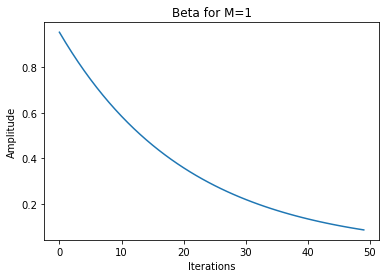

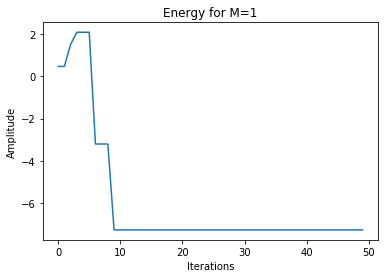

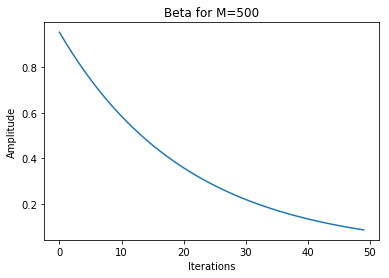

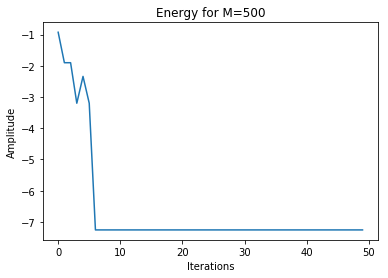

In [10]:
for h in range(M.shape[0]):
    plt.figure()
    plt.plot(arrBeta[h,:])
    plt.xlabel('Iterations')
    plt.ylabel('Amplitude')
    plt.title('Beta for M=' + str(M[h]))
    plt.figure()
    plt.plot(arrE[h,:])
    plt.xlabel('Iterations')
    plt.ylabel('Amplitude')
    plt.title('Energy for M=' + str(M[h]))
plt.show()

### b) Plot Energies for all states

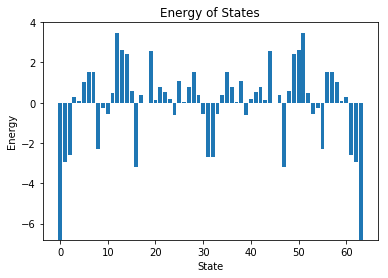

In [6]:
arrStateEnergy = np.zeros(2**N)
states = getPermut(N)
for i in range(states.shape[0]):
    arrStateEnergy[i] = calcEnergy(states[i,:], W)

plt.figure()
plt.bar(range(2**N),arrStateEnergy)
plt.xlabel('State')
plt.ylabel('Energy')
plt.title('Energy of States')

plt.show()

### Plot Probabilities of the states for different betas

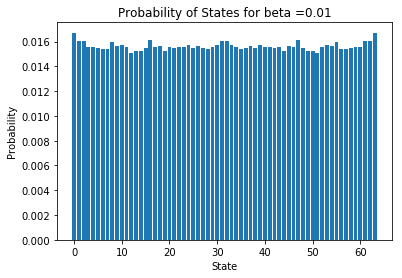

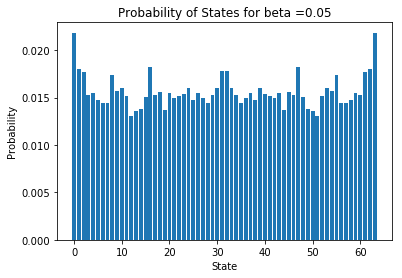

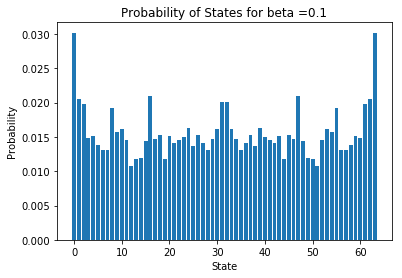

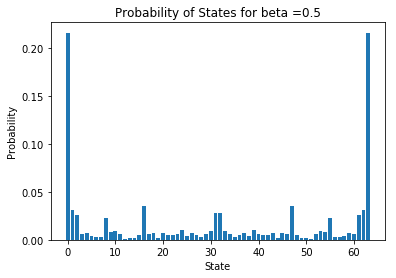

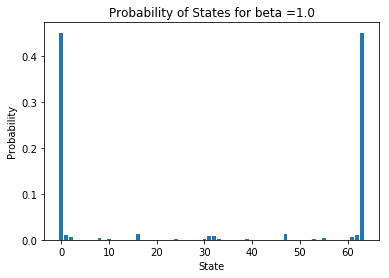

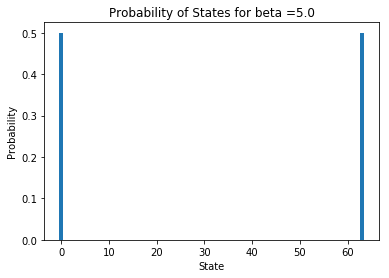

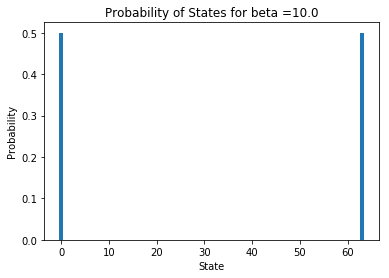

In [7]:
betas = np.array([0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0])
arrStateProbabs = np.zeros([betas.shape[0],2**N])
states = getPermut(N)
for i in range(betas.shape[0]):
    for j in range(states.shape[0]):
        arrStateProbabs[i,j] = calcProbability(states[j,:], W, betas[i])

    plt.figure()
    plt.bar(range(2**N),arrStateProbabs[i,:])
    plt.xlabel('State')
    plt.ylabel('Probability')
    plt.title('Probability of States for beta =' + str(betas[i]))

plt.show()
